In [ ]:
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d gpiosenka/cats-in-the-wild-image-classification

 99% 122M/123M [00:04<00:00, 34.2MB/s]
100% 123M/123M [00:04<00:00, 28.2MB/s]


In [ ]:
!unzip /content/cats-in-the-wild-image-classification.zip

Archive:  /content/cats-in-the-wild-image-classification.zip
  inflating: EfficientNetB0-10-(224 X 224)-100.00.h5  
  inflating: MobileNetV3 small-10-(224 X 224)-95.96.h5  
  inflating: WILDCATS.CSV            
  inflating: test/AFRICAN LEOPARD/1.jpg  
  inflating: test/AFRICAN LEOPARD/2.jpg  
  inflating: test/AFRICAN LEOPARD/3.jpg  
  inflating: test/AFRICAN LEOPARD/4.jpg  
  inflating: test/AFRICAN LEOPARD/5.jpg  
  inflating: test/CARACAL/1.jpg      
  inflating: test/CARACAL/2.jpg      
  inflating: test/CARACAL/3.jpg      
  inflating: test/CARACAL/4.jpg      
  inflating: test/CARACAL/5.jpg      
  inflating: test/CHEETAH/1.jpg      
  inflating: test/CHEETAH/2.jpg      
  inflating: test/CHEETAH/3.jpg      
  inflating: test/CHEETAH/4.jpg      
  inflating: test/CHEETAH/5.jpg      
  inflating: test/CLOUDED LEOPARD/1.jpg  
  inflating: test/CLOUDED LEOPARD/2.jpg  
  inflating: test/CLOUDED LEOPARD/3.jpg  
  inflating: test/CLOUDED LEOPARD/4.jpg  
  inflating: test/CLOUDED LEOPA

##Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# data augmentation for the training variable

train_datagen = ImageDataGenerator(rescale =1./255,zoom_range=0.2,shear_range=0.2, rotation_range=10, horizontal_flip=True, validation_split=0.1, brightness_range=[0.3,0.8])

In [ ]:
# data augmentation for the testing variable

test_datagen = ImageDataGenerator(rescale =1./255)

In [ ]:
# data augmentation on the training data


x_train = train_datagen.flow_from_directory('/content/train', target_size=(224,224), batch_size=8)


Found 2339 images belonging to 10 classes.


In [ ]:
'''# data augmentation on the training data


x_train = keras.preprocessing.image_dataset_from_directory('/content/train',
                                            image_size=(224,224),
                                            batch_size = 20,
                                            shuffle = True,
                                            seed=101)'''

Found 2339 files belonging to 10 classes.


In [ ]:
x_valid = train_datagen.flow_from_directory('/content/valid', target_size=(224,224), batch_size=8)

Found 50 images belonging to 10 classes.


In [ ]:
'''x_valid = keras.preprocessing.image_dataset_from_directory('/content/valid',
                                            image_size=(224,224),
                                            batch_size = 20,
                                            shuffle = True,
                                            seed=101)'''

Found 50 files belonging to 10 classes.


In [ ]:
# data augmentation on the testing data


test = test_datagen.flow_from_directory('/content/test', target_size=(224,224), batch_size=8)

Found 50 images belonging to 10 classes.


In [ ]:
'''# data augmentation on the testing data



x_test = keras.preprocessing.image_dataset_from_directory('/content/test',
                                            image_size=(224,224),
                                            batch_size = 20)'''

Found 50 files belonging to 10 classes.


##ResNet50 model Building

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.models import Model, Sequential

In [ ]:
resnet50 = ResNet50(include_top = False, input_shape=(224,224,3))

In [ ]:
'''pretrainedmodel = keras.applications.ResNet50(include_top=False, input_shape=(224,224,3), pooling='avg', classes=23, weights='imagenet')
for layer in pretrainedmodel.layers:
  layer.trainable=False
resnet50=Sequential()
resnet50.add(pretrainedmodel)
resnet50.add(Flatten())
resnet50.add(Dense(1024, activation='relu'))
resnet50.add(Dense(23, activation='softmax'))
'''

In [ ]:
for layer in resnet50.layers:   #default layers of resnet50
  print(layer)

In [ ]:
for layer in resnet50.layers:
  layer.trainable= False

In [ ]:
x = Flatten()(resnet50.output)

In [ ]:
# defining var o/p
output = Dense(10, activation='softmax')(x)

In [ ]:
resnet50=Model(resnet50.input, output)

In [ ]:
resnet50.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
resnet50.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [ ]:
resnet50.fit(x_train, validation_data=x_valid, epochs=80, steps_per_epoch=len(x_train), validation_steps=len(x_valid),batch_size=8)


Epoch 1/80
293/293 [==============================] - 52s 141ms/step - loss: 4.9240 - accuracy: 0.1372 - val_loss: 5.2483 - val_accuracy: 0.2000
Epoch 2/80
293/293 [==============================] - 39s 132ms/step - loss: 4.1936 - accuracy: 0.1851 - val_loss: 4.4877 - val_accuracy: 0.1800
Epoch 3/80
293/293 [==============================] - 40s 135ms/step - loss: 3.9496 - accuracy: 0.2189 - val_loss: 2.5874 - val_accuracy: 0.3600
Epoch 4/80
293/293 [==============================] - 42s 142ms/step - loss: 4.0429 - accuracy: 0.2292 - val_loss: 5.6475 - val_accuracy: 0.2400
Epoch 5/80
293/293 [==============================] - 39s 132ms/step - loss: 3.7411 - accuracy: 0.2420 - val_loss: 3.2151 - val_accuracy: 0.2000
Epoch 6/80
293/293 [==============================] - 40s 135ms/step - loss: 4.1827 - accuracy: 0.2569 - val_loss: 5.3232 - val_accuracy: 0.1400
Epoch 7/80
293/293 [==============================] - 40s 137ms/step - loss: 4.0387 - accuracy: 0.2531 - val_loss: 3.3906 - val_ac

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.models import Model

In [ ]:
vgg = VGG16(include_top= False, input_shape=(224,224,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg.layers:   #default layers of vgg
  print(layer)

In [ ]:
for layer in vgg.layers:
  layer.trainable= False

In [ ]:
x = Flatten()(vgg.output)


In [ ]:
output = Dense(10, activation='softmax')(x)

In [ ]:
vgg16 = Model(vgg.input, output)


In [ ]:
vgg16.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg16.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [ ]:
vgg16.fit(x_train, validation_data=x_valid, epochs=50, steps_per_epoch=len(x_train), validation_steps=len(x_valid), batch_size=20)

Epoch 1/50
293/293 [==============================] - 41s 140ms/step - loss: 0.8700 - accuracy: 0.7469 - val_loss: 2.0241 - val_accuracy: 0.5200
Epoch 2/50
293/293 [==============================] - 40s 138ms/step - loss: 0.8009 - accuracy: 0.7644 - val_loss: 1.4134 - val_accuracy: 0.6200
Epoch 3/50
293/293 [==============================] - 43s 147ms/step - loss: 0.6287 - accuracy: 0.8123 - val_loss: 1.9263 - val_accuracy: 0.5800
Epoch 4/50
293/293 [==============================] - 41s 141ms/step - loss: 0.5905 - accuracy: 0.8273 - val_loss: 0.8791 - val_accuracy: 0.7800
Epoch 5/50
293/293 [==============================] - 41s 141ms/step - loss: 0.5998 - accuracy: 0.8324 - val_loss: 1.1216 - val_accuracy: 0.8000
Epoch 6/50
293/293 [==============================] - 42s 145ms/step - loss: 0.5002 - accuracy: 0.8487 - val_loss: 1.0181 - val_accuracy: 0.6400
Epoch 7/50
293/293 [==============================] - 41s 138ms/step - loss: 0.5207 - accuracy: 0.8452 - val_loss: 1.6293 - val_ac

In [ ]:
vgg16.save('BigCatProject.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

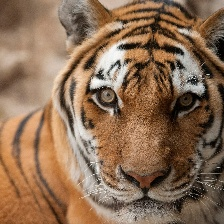

In [ ]:
img = image.load_img('/content/test/TIGER/1.jpg',target_size =(224,224))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(vgg16.predict(x))
op =['AFRICAN LEOPARD','CARACAL','CHEETAH','CLOUDED LEOPARD','JAGUAR','LIONS','OCELOT','PUMA','SNOW LEOPARD','TIGER']
op[pred]

1/1 [==============================] - 0s 25ms/step


'TIGER'

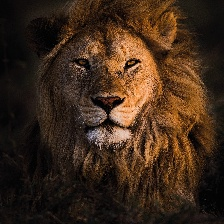

In [ ]:
img = image.load_img('/content/test/LIONS/1.jpg',target_size =(224,224))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(vgg16.predict(x))
op =['AFRICAN LEOPARD','CARACAL','CHEETAH','CLOUDED LEOPARD','JAGUAR','LIONS','OCELOT','PUMA','SNOW LEOPARD','TIGER']
op[pred]

1/1 [==============================] - 0s 24ms/step


'LIONS'